In [55]:
from matplotlib import pyplot as plt
import platform, os, sys
import numpy as np
from tabulate import tabulate
from pprint import pprint
from tqdm import tqdm

if 'Windows' in platform.system():
    print "Working in Windows..."
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
elif 'Linux' in platform.system():
    print "Working in Linux..."
    sys.path.append(r'/mnt/s/_Data/160603 - EonHe M016v5/modules')
    from BEM import interpolate_slow
    %config InlineBackend.figure_format='retina'

from Common import common, kfit
from TrapAnalysis import trap_analysis, resonator_analysis, import_data
from HeliumSurface.static_surface import *

%matplotlib inline
#%config InlineBackend.figure_format='retina'

common.configure_axes(13)

Working in Linux...


In [56]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Electrostatic potential

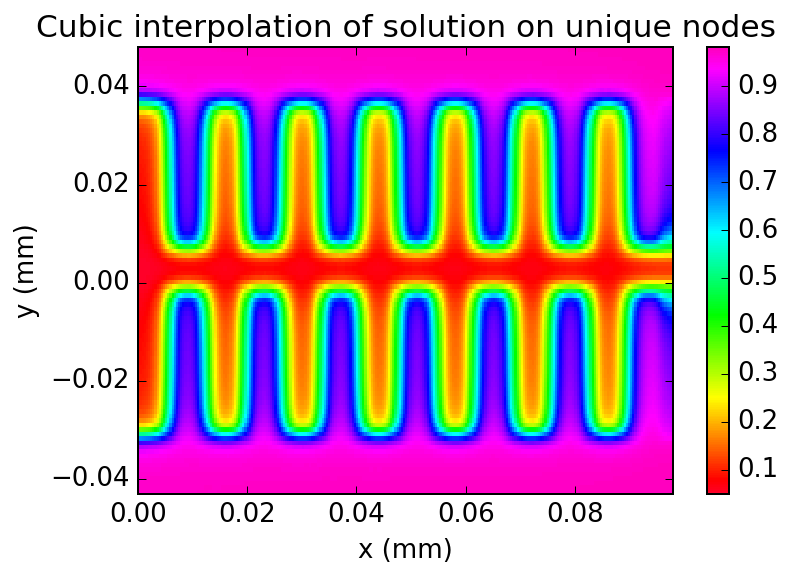

In [204]:
xeval = np.linspace(bounding_box[0], bounding_box[1], 251)
yeval = np.linspace(bounding_box[2], bounding_box[3], 101)

data_file = r"/mnt/s/Gerwin/Electron on helium/Maxwell/M017 Fun/3um_gap_4um_width_at_1um.dsp"
elements, nodes, elem_solution, bounding_box = import_data.load_dsp(data_file)
xdata, ydata, Udata = interpolate_slow.prepare_for_interpolation(elements, nodes, elem_solution)
X, Y, U = interpolate_slow.plot_BC(xdata, ydata, Udata, xeval=xeval, yeval=yeval, cmap=plt.cm.gist_rainbow)

f = 14.198 +/- 0.199 GHz
65.011879774


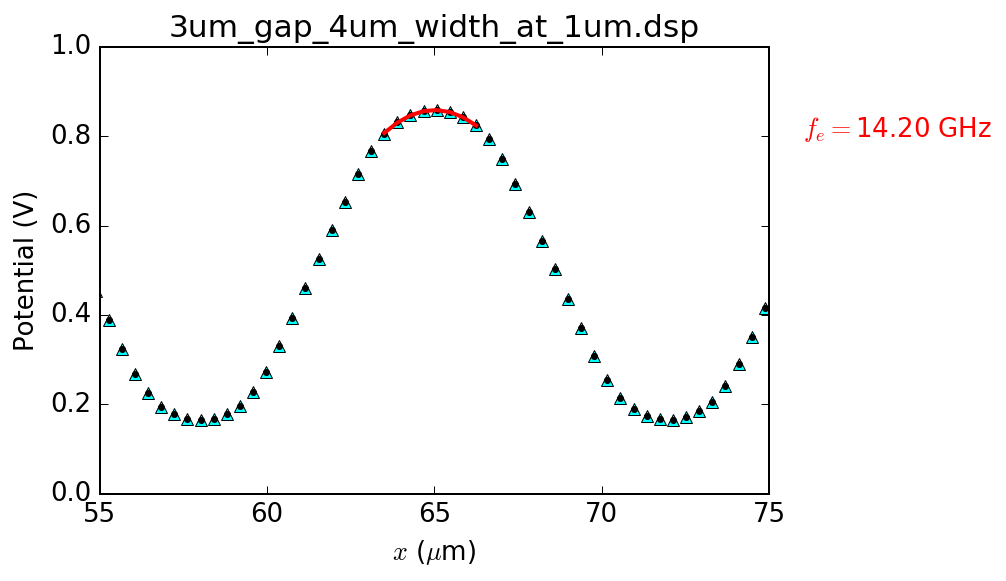

In [205]:
yoi = U[25,:]

plt.figure()
common.configure_axes(13)
plt.plot(xeval*1E3, yoi, "^", color="aqua")

ax = plt.gca()
ax.set_axis_bgcolor('none')

t = trap_analysis.TrapSolver()
fr, ferr = t.fit_electron_potential(xeval*1E3, yoi, (65-1.5, 65+1.5), do_plot=True)
fe, dfe = t.get_electron_frequency(fr, ferr)

ax.set_xlim(55, 75)
plt.text(76, 0.8, "$f_e = $%.2f GHz"%(fe/1E9), color='red')
plt.title(os.path.split(data_file)[1])

print fr[2]
#common.save_figure(plt.gcf(), save_path=os.path.join(os.path.split(data_file)[0]))

# Coupling

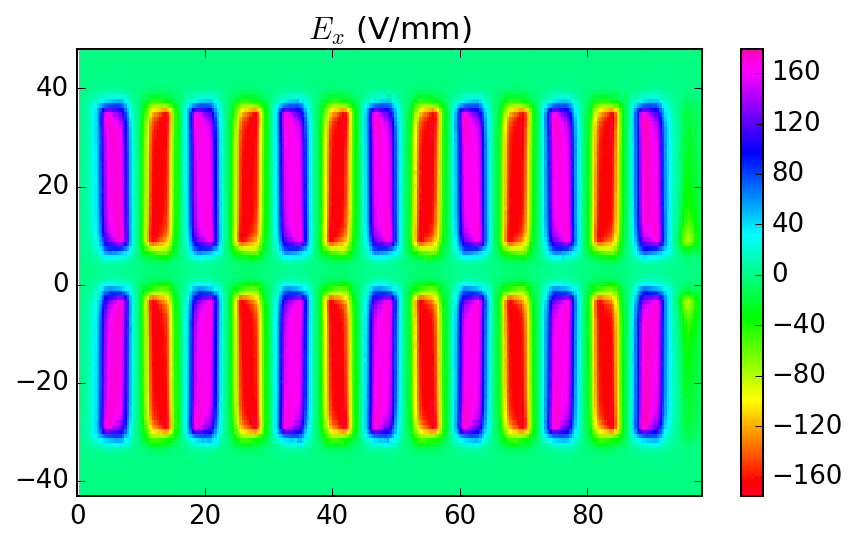

In [206]:
dx = np.diff(xeval)[0]

plt.figure(figsize=(7.,4.))
plt.pcolor(X[:,1:]*1E3, Y[:,1:]*1E3, (U[:,1:]-U[:,:-1])/dx, cmap=plt.cm.gist_rainbow)
plt.colorbar()
plt.xlim(np.min(xeval)*1E3, np.max(xeval)*1E3)
plt.ylim(np.min(yeval)*1E3, np.max(yeval)*1E3)
plt.title("$E_x$ (V/mm)")
#common.save_figure(plt.gcf(), save_path=os.path.join(os.path.split(data_file)[0]))

67679.6660999
-26568.5491947


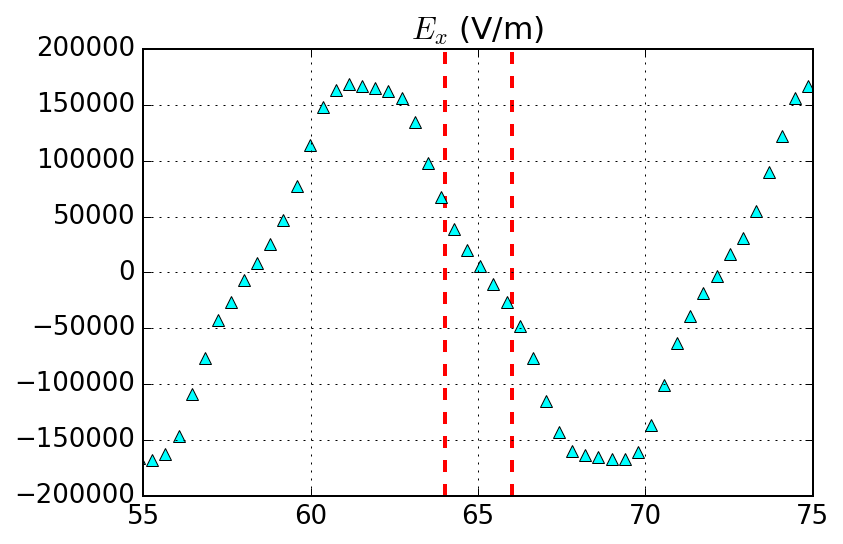

In [207]:
yoi = (U[25,1:]-U[25,:-1])/dx

plt.figure()
common.configure_axes(13)
plt.plot(xeval[1:]*1E3, yoi*1E3, "^", color="aqua")

ax = plt.gca()
ax.set_axis_bgcolor('none')
ax.set_xlim(55, 75)
plt.title("$E_x$ (V/m)")
plt.vlines((fr[2]-1,fr[2]+1), -2E5, 2E5, linestyles='--', color='r', lw=2)
plt.grid()

print yoi[common.find_nearest(fr[2]-1, xeval[1:]*1E3)]*1E3
print yoi[common.find_nearest(fr[2]+1, xeval[1:]*1E3)]*1E3

#common.save_figure(plt.gcf(), save_path=os.path.join(os.path.split(data_file)[0]))